In [202]:
#fonte dos dados
fonte= 'https://raw.githubusercontent.com/ClarisseAlvarenga/lives_twitch/master/LOL/high_diamond_ranked_10min.csv'

# **ANALISANDO ESTATÍSTICAS DE JOGOS RANKEADOS DE LOL**

Fonte: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

**Texto do Kaggle**

**Context**
League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.

**Content**
This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.

Each game is unique. The gameId can help you to fetch more attributes from the Riot API.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level… It's up to you to do some feature engineering to get more insights.

The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.

So far I know, there is no missing value.



**Glossary**

**Warding totem:** An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.

**Minions:** NPC that belong to both teams. They give gold when killed by players.

**Jungle minions:** NPC that belong to NO TEAM. They give gold and buffs when killed by players.

**Elite monsters:** Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.

**Dragons:** Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.

**Herald:** Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.

**Towers**: Structures you have to destroy to reach the enemy Nexus. They give gold.

**Level:** Champion level. Start at 1. Max is 18.


In [203]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [204]:
lol = pd.read_csv(fonte)
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [205]:
#colunas
lol.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [206]:
#vendo se temos nulos
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [207]:
lol.shape

(9879, 40)

In [208]:
corr = lol.corr()
corr

cm = sns.light_palette("blue", as_cmap=True)
#estilizando o dataset
corr.style.format("{:.2f}")
s = corr.style.background_gradient(cmap=cm)
s

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,

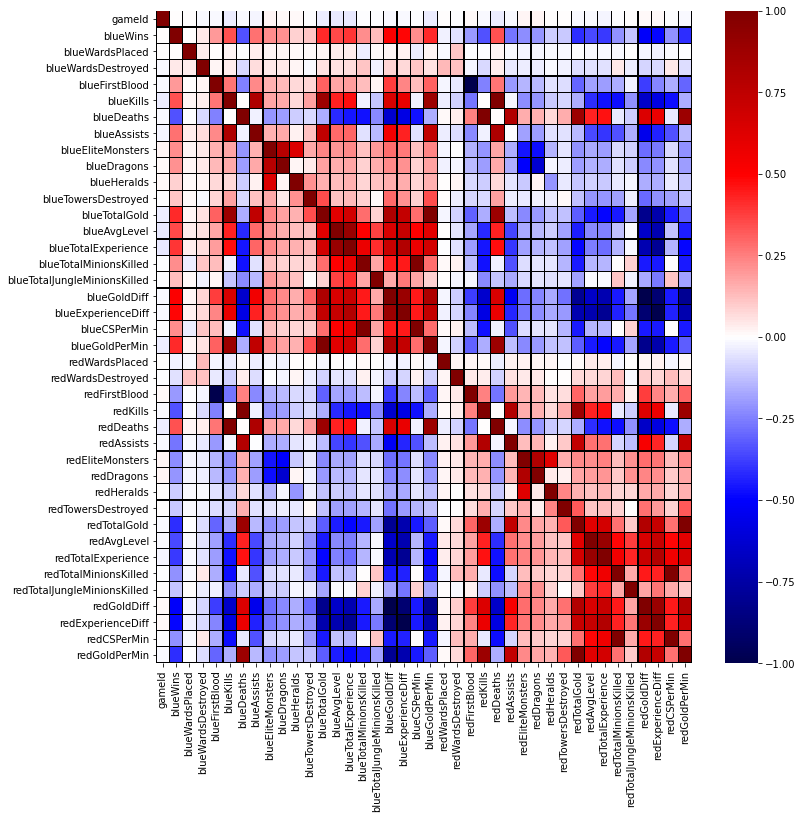

In [209]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='seismic',linecolor='black', linewidths=0.2);

In [210]:
#retirando as colunas com menos de 0.1 de correlação com a variável Alvo (blueWins)
lol_corr = lol.drop(['blueWardsPlaced','blueWardsDestroyed','blueHeralds','redWardsPlaced', 'redWardsDestroyed','redHeralds'], axis=1) 
lol_corr

,gameId,blueWins,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,1,9,6,11,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,0,6,9,8,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,0,5,5,5,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,1,5,5,2,2,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,0,7,11,4,1,1,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,1,11,7,14,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,0,4,5,5,1,0,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,1,5,4,10,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,0,6,6,6,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,1,6,6,7,1,1,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,1,7,4,5,1,1,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,0,4,7,7,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,0,6,4,8,1,1,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,1,4,6,3,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,0,6,7,5,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,1,7,6,11,1,1,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,1,2,3,3,1,1,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,0,3,2,1,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


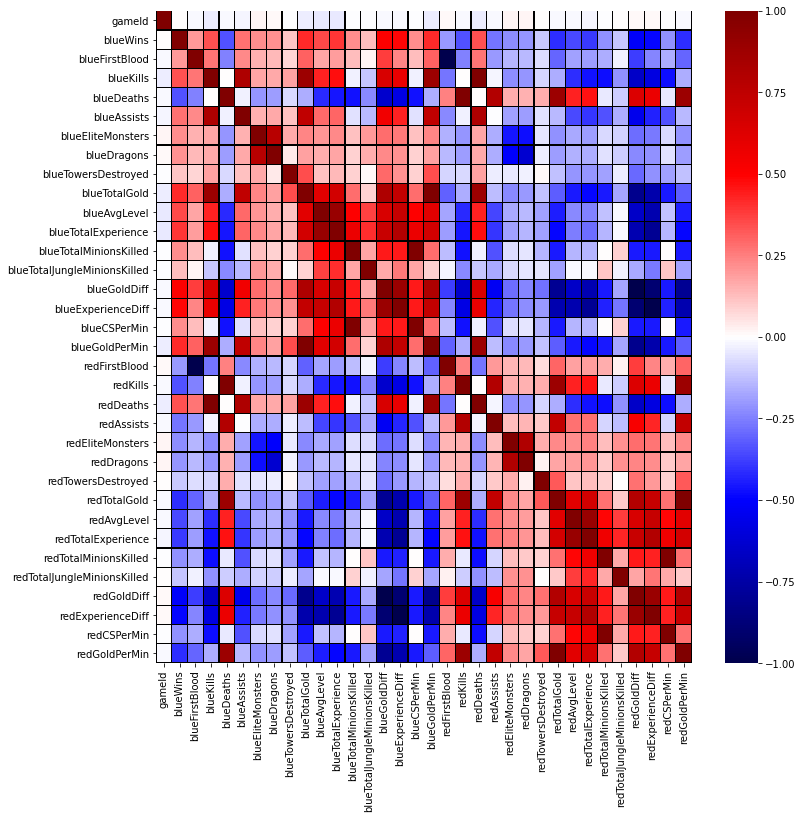

In [211]:
hm = lol_corr.corr()
plt.figure(figsize=(12,12))
sns.heatmap(hm, cmap='seismic',linecolor='black', linewidths=0.2);

In [212]:
#cm = sns.light_palette("blue", as_cmap=True)
#estilizando o dataset
hm.style.format("{:.2f}")
s = hm.style.background_gradient(cmap='seismic')
s

,gameId,blueWins,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueFirstBlood,-0.011577,0.201769,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.151603,-0.204764,0.178540,-0.156764,-0.455139,-0.471754,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.039750,0.186413,0.160683,0.179083,0.086686,0.159595,0.233875,0.211496,0.086686,0.186413,-0.134309,-0.188852,0.170436,-0.162406,-0.506546,-0.631930,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871
blueTowersDestroyed,-0.007467,0.115566,0.083316,0.180314,-0.071441,0.123663,0.166644,0.039750,1.000000,0.350941,0.124453,0.139398,0.092291,0.008165,0.294060,0.218320,0.092291,0.350941,-0.083316,-0.071441,0.180314,-0.036254,-0.041099,-0.028482,0.011738,-0.122465,-0.204429,-0.210167,-0.186879,-0.038505,-0.294060,-0.218320,-0.186879,-0.122465
blueTotalGold,-0.033754,0.417213,0.312058,0.888751,-0.162572,0.748352,0.239396,0.186413,0.350941,1.000000,0.616968,0.676193,0.284902,0.090769,0.816803,0.729345,0.284902,1.000000,-0.312058,-0.162572,0.888751,-0.128921,-0.227236,-0.201794,-0.119579,-0.314212,-0.447049,-0.491268,-0.452593,-0.175275,-0.816803,-0.729345,-0.452593,-0.314212


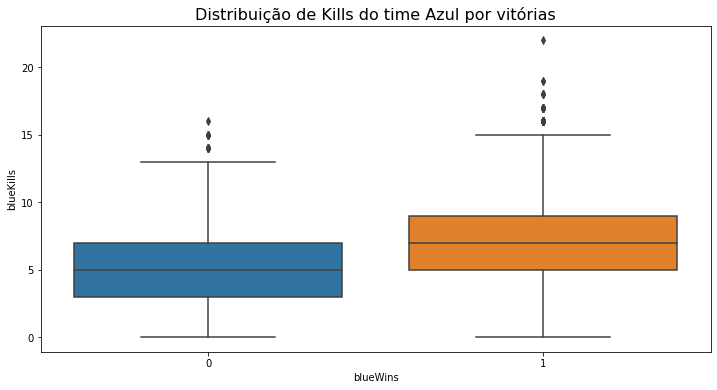

In [213]:
#vamos fazer algumas visualizações antes de cortar mais colunas
plt.figure(figsize=(12,6))
sns.boxplot(data= lol, y='blueKills', x='blueWins')
plt.title('Distribuição de Kills do time Azul por vitórias', fontsize=16);

In [214]:
lol.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

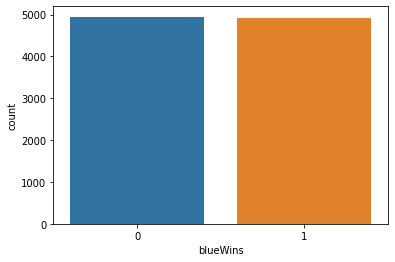

In [215]:
sns.countplot(x=lol.blueWins);

In [216]:
#colocar o gameId como índice
lol.set_index('gameId',inplace=True)


In [217]:
lol.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [218]:
lol['redLoses'] = lol['blueWins']

In [219]:
#pegando as colunas que contém a palavra "blue"
colunas_blue = lol.columns[lol.columns.str.contains('blue')]
#pegando as colunas que contém a palavra "red"
colunas_red = lol.columns[lol.columns.str.contains('red')]

In [220]:
colunas_blue

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin'],
      dtype='object')

In [221]:
blue = lol[colunas_blue]
red=lol[colunas_red]

In [222]:
blue.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


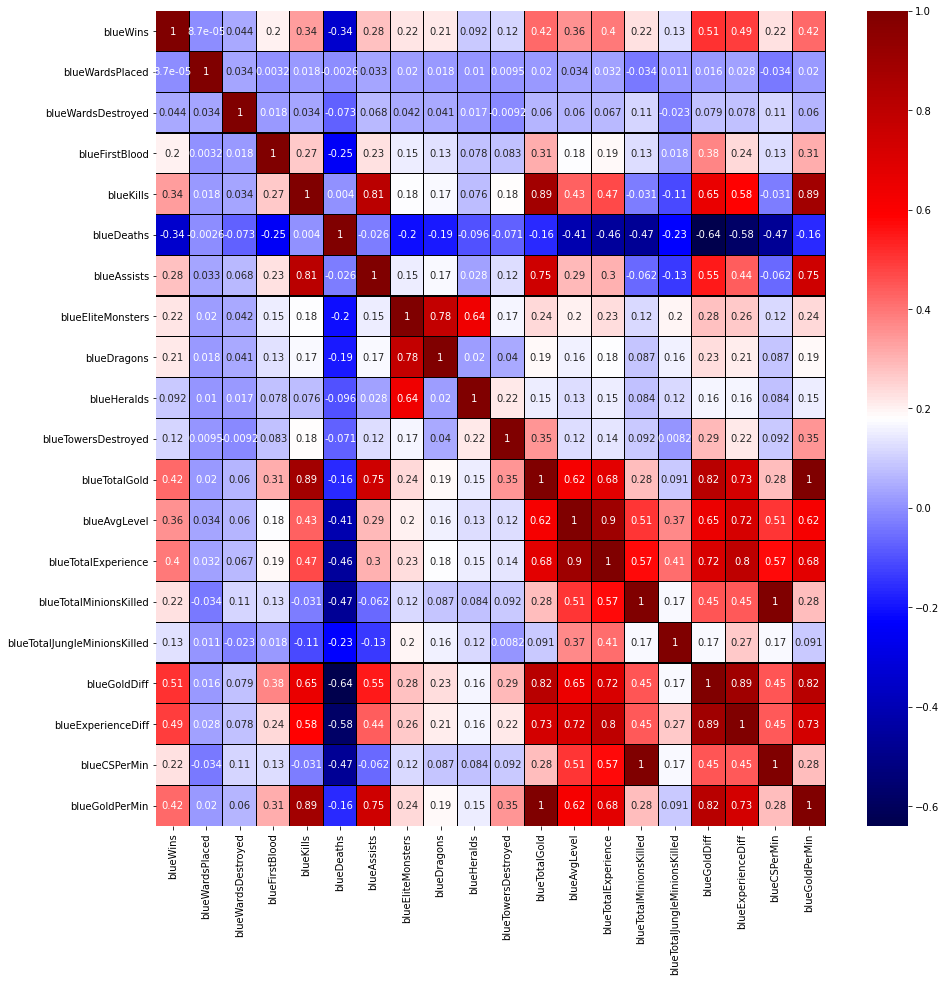

In [223]:
#refazendo o mapa de correlação só com o time azul
blue_corr = blue.corr()
plt.figure(figsize=(15,15))
sns.heatmap(blue_corr, cmap='seismic',linecolor='black', linewidths=0.1, annot=True);

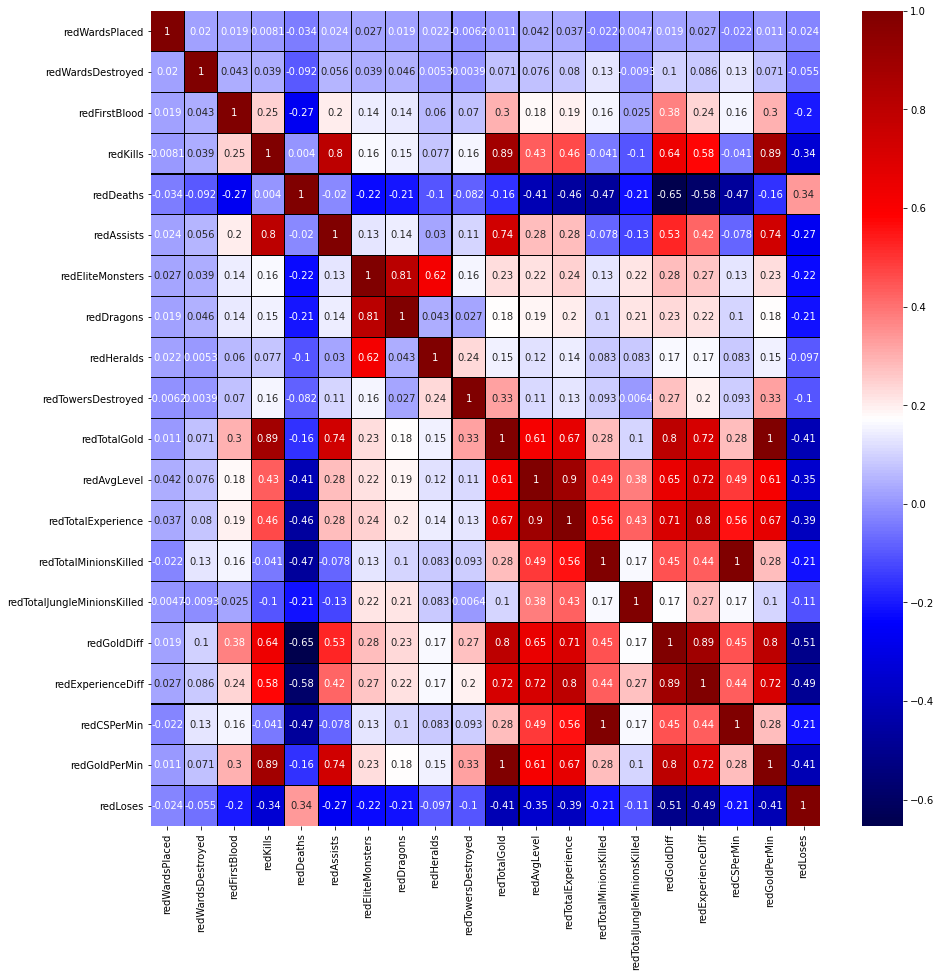

In [224]:
#refazendo o mapa de correlação só com o time vermelho
red_corr = red.corr()
plt.figure(figsize=(15,15))
sns.heatmap(red_corr, cmap='seismic',linecolor='black', linewidths=0.1, annot=True);

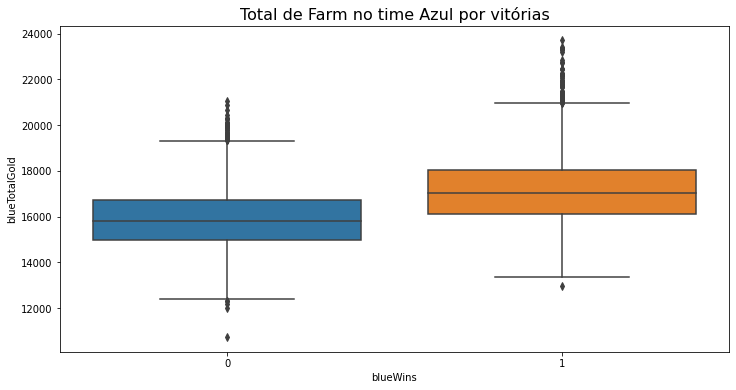

In [225]:
#vamos fazer algumas visualizações antes de cortar mais colunas
plt.figure(figsize=(12,6))
sns.boxplot(data= lol, y='blueTotalGold', x='blueWins')
plt.title('Total de Farm no time Azul por vitórias', fontsize=16);

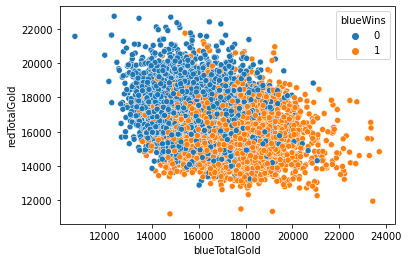

In [226]:
#fazendo um gráfico de dispersão 
sns.scatterplot(data=lol, y='redTotalGold', x='blueTotalGold', hue='blueWins');

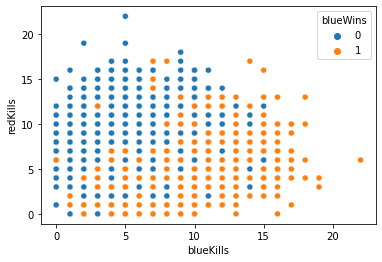

In [227]:
#fazendo um gráfico de dispersão 
sns.scatterplot(data=lol, y='redKills', x='blueKills', hue='blueWins');

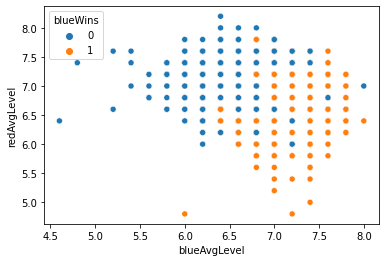

In [228]:
#fazendo um gráfico de dispersão 
sns.scatterplot(data=lol, y='redAvgLevel', x='blueAvgLevel', hue='blueWins');

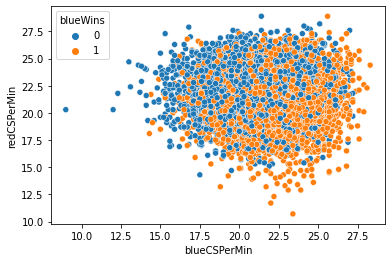

In [229]:
#fazendo um gráfico de dispersão 
sns.scatterplot(data=lol, y='redCSPerMin', x='blueCSPerMin', hue='blueWins');

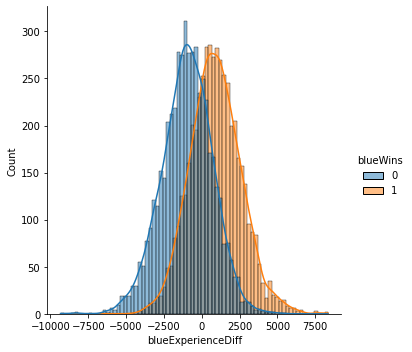

In [281]:
sns.displot(data=lol, x='blueExperienceDiff', hue='blueWins',kde=True);

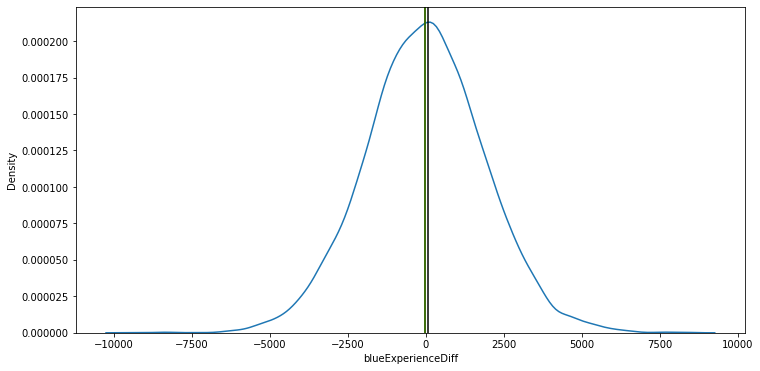

In [299]:
plt.figure(figsize=(12,6))
sns.kdeplot(lol.blueExperienceDiff)
plt.axvline(lol.blueExperienceDiff.mean(),color='r')
plt.axvline(lol.blueExperienceDiff.median(),color='g')
plt.axvline(lol.blueExperienceDiff.mode()[0],color='k');

In [286]:
#fazendo um teste de normalidade do scipy
from scipy.stats import normaltest
alpha = 0.05
stats, p_value = normaltest(lol.blueExperienceDiff)

In [288]:
#fazendo o teste de normalidade
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("A hipótese nula pode ser rejeitada")
else:
    print("A hipótese nula NÃO pode ser rejeitada")

A hipótese nula pode ser rejeitada


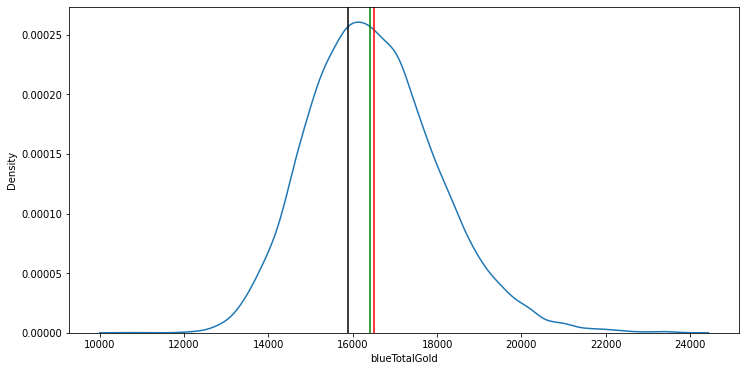

In [296]:
#fazendo a distribuição do total de Gold no jogo
plt.figure(figsize=(12,6))
ax=sns.kdeplot(x=lol.blueTotalGold)
plt.axvline(lol.blueTotalGold.mean(),color='r') #média vermelho
plt.axvline(lol.blueTotalGold.median(),color='g')#mediana verde
plt.axvline(lol.blueTotalGold.mode()[0],color='k')#moda preto;

In [231]:
#fazendo uma crosstab pro kiresm17
kills_wins = pd.crosstab(index=lol.blueKills, columns=lol.blueWins, 
                         aggfunc='mean', values=lol.blueTotalGold)
kills_wins['diff'] = kills_wins[1] - kills_wins[0] 
kills_wins

blueWins,0,1,diff
blueKills,,,
0,13578.944444,13969.111111,390.166667
1,13975.845850,14576.583333,600.737484
2,14470.465217,14929.013423,458.548205
3,14938.567976,15320.615686,382.047710
4,15364.809388,15776.101449,411.292061
5,15827.183511,16181.569091,354.385580
6,16227.812983,16658.398519,430.585536
7,16654.665347,17058.546603,403.881257
8,17084.976127,17496.352212,411.376085


In [232]:
#fazendo uma crosstab pro kiresm17
kills_wins = pd.crosstab(index=lol.blueKills, columns=lol.blueWins, 
                         aggfunc='mean', values=lol.blueGoldDiff)
kills_wins

blueWins,0,1
blueKills,,
0,-3636.777778,-1963.888889
1,-3167.786561,-983.433333
2,-2725.780435,-929.516779
3,-2102.392749,-619.313725
4,-1802.945946,-201.737060
5,-1258.648936,257.040000
6,-916.438949,745.914074
7,-401.459406,1232.353870
8,103.432361,1609.927434


In [233]:
#fazendo uma crosstab pro kiresm17
kills_wins = pd.crosstab(index=lol.blueKills, columns=lol.blueWins)
kills_wins

blueWins,0,1
blueKills,,
0,54,9
1,253,60
2,460,149
3,662,255
4,703,483
5,752,550
6,647,675
7,505,633
8,377,565


Qual a diferença média de kill entre os vencedores e os perdedores

In [234]:
lol['blueKillsDiff'] = lol['blueKills']- lol['redKills']

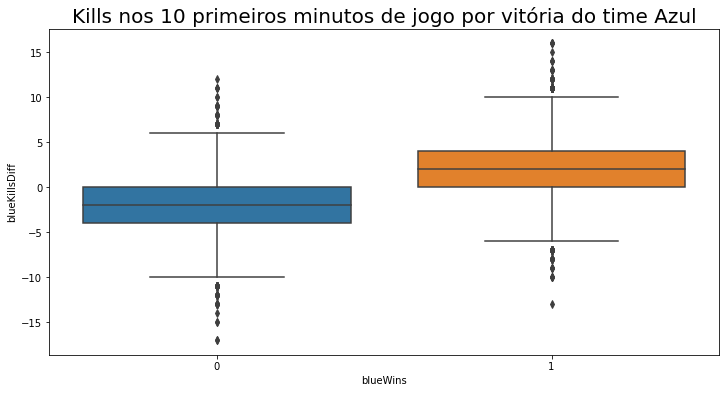

In [279]:
plt.figure(figsize=(12,6))
sns.boxplot(y=lol.blueKillsDiff, x=lol.blueWins);
plt.title('Kills nos 10 primeiros minutos de jogo por vitória do time Azul', fontsize=20);

### Verificando as médias de algumas features por  quem ganha ou perde

In [236]:
#pegando as colunas que contém diff
colunas_diff = lol.columns[lol.columns.str.contains('Diff')]
colunas_diff

Index(['blueGoldDiff', 'blueExperienceDiff', 'redGoldDiff',
       'redExperienceDiff', 'blueKillsDiff'],
      dtype='object')

In [237]:
lol.groupby('blueWins')[['blueKillsDiff','blueKills', 'redKills']].mean()

,blueKillsDiff,blueKills,redKills
blueWins,,,
0,-1.961002,5.170135,7.131138
1,2.061258,7.201623,5.140365


In [238]:
lol.groupby('blueWins')[['blueGoldDiff','blueTotalGold', 'redTotalGold']].mean()

,blueGoldDiff,blueTotalGold,redTotalGold
blueWins,,,
0,-1237.066680,15864.111134,17101.177814
1,1270.718053,17145.263895,15874.545842


In [239]:
lol.groupby('blueWins')[['blueExperienceDiff','blueTotalExperience', 'redTotalExperience']].mean()

,blueExperienceDiff,blueTotalExperience,redTotalExperience
blueWins,,,
0,-971.898969,17453.47161,18425.370580
1,908.274442,18404.57789,17496.303448


## Testando vários algoritmos de feature selection

In [240]:
#escolhendo features com a ajuda do RFECV
from sklearn.feature_selection import RFECV, f_classif,SelectFwe, SelectKBest, SelectFdr, SelectFpr, SelectFromModel
#importando alguns modelos de classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#separando entre X e Y
from sklearn.model_selection import train_test_split


In [241]:
#classificadores
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier
#seletores
rfe = RFECV(dtc)
fpr = SelectFpr()

In [242]:
#separando as variáveis explicativas da variável alvo
X = lol.drop(['blueWins', 'redLoses'], axis=1)
y = lol['blueWins']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [244]:
rfe.fit(X_train,y_train)

RFECV(cv=None,
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [245]:
fpr.fit(X_train,y_train)

SelectFpr(alpha=0.05, score_func=<function f_classif at 0x7f939adc4400>)

In [246]:
#verificar quais foram as colunas que o rfe escolheu
selection = pd.DataFrame()

In [247]:
selection['colunas'] = X_train.columns
selection['features_rfe'] = rfe.get_support()
selection['features_fpr'] = fpr.get_support()
selection.query('features_rfe == True and features_fpr == True')

,colunas,features_rfe,features_fpr
1,blueWardsDestroyed,True,True
3,blueKills,True,True
4,blueDeaths,True,True
5,blueAssists,True,True
10,blueTotalGold,True,True
12,blueTotalExperience,True,True
13,blueTotalMinionsKilled,True,True
14,blueTotalJungleMinionsKilled,True,True
15,blueGoldDiff,True,True
16,blueExperienceDiff,True,True


In [248]:
kbest = SelectKBest()

In [249]:
kbest.fit(X_train,y_train)

SelectKBest(k=10, score_func=<function f_classif at 0x7f939adc4400>)

In [250]:
selection['features_kbest'] = kbest.get_support()
selection.query('features_kbest == True')

,colunas,features_rfe,features_fpr,features_kbest
10,blueTotalGold,True,True,True
12,blueTotalExperience,True,True,True
15,blueGoldDiff,True,True,True
16,blueExperienceDiff,True,True,True
18,blueGoldPerMin,True,True,True
29,redTotalGold,True,True,True
34,redGoldDiff,True,True,True
35,redExperienceDiff,True,True,True
37,redGoldPerMin,True,True,True
38,blueKillsDiff,True,True,True


In [251]:
fmodel = SelectFromModel(dtc)

In [252]:
#testando o SelectFromModel
fmodel.fit(X_train,y_train)
selection['features_from_model'] = fmodel.get_support()
selection.query('features_from_model == True')


,colunas,features_rfe,features_fpr,features_kbest,features_from_model
0,blueWardsPlaced,True,False,False,True
12,blueTotalExperience,True,True,True,True
14,blueTotalJungleMinionsKilled,True,True,False,True
15,blueGoldDiff,True,True,True,True
16,blueExperienceDiff,True,True,True,True
18,blueGoldPerMin,True,True,True,True
19,redWardsPlaced,True,True,False,True
31,redTotalExperience,True,True,False,True
32,redTotalMinionsKilled,True,True,False,True
33,redTotalJungleMinionsKilled,True,True,False,True


### Testando um modelo só com os Diff do blue

In [253]:
#buscando só as colunas que contem DIFF
colunas = lol.columns[lol.columns.str.contains('Diff')]
#Excluindo as colunas que contem RED
X = lol[colunas].drop(colunas[colunas.str.contains('red')], axis=1)
y= lol['blueWins']

In [254]:
X.head()


,blueGoldDiff,blueExperienceDiff,blueKillsDiff
gameId,,,
4519157822,643,-8,3
4523371949,-2908,-1173,0
4521474530,-1172,-1033,-4
4524384067,-1321,-7,-1
4436033771,-1004,230,0


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [256]:
modelo = RandomForestClassifier()

In [257]:
#ajustando o modelo aos dados
modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [258]:
y_pred = modelo.predict(X_test)

In [259]:
from sklearn.metrics import f1_score, classification_report

In [260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1236
           1       0.68      0.65      0.67      1234

    accuracy                           0.67      2470
   macro avg       0.67      0.67      0.67      2470
weighted avg       0.67      0.67      0.67      2470



### Selecionando nosso modelo pelas features com $+-0.3$ de correlação com a variável alvo, retirando as colunas que possuem correlação perfeita (1 ou -1) entre si

In [261]:
alta_corr = corr.query('blueWins > 0.3 or blueWins < -0.3')
features = alta_corr.index
corr = alta_corr[features]
corr.style.background_gradient(cmap='seismic')


,blueWins,blueKills,blueDeaths,blueTotalGold,blueAvgLevel,blueTotalExperience,blueGoldDiff,blueExperienceDiff,blueGoldPerMin,redKills,redDeaths,redTotalGold,redAvgLevel,redTotalExperience,redGoldDiff,redExperienceDiff,redGoldPerMin
blueWins,1.000000,0.337358,-0.339297,0.417213,0.357820,0.396141,0.511119,0.489558,0.417213,-0.339297,0.337358,-0.411396,-0.352127,-0.387588,-0.511119,-0.489558,-0.411396
blueKills,0.337358,1.000000,0.004044,0.888751,0.434867,0.472155,0.654148,0.583730,0.888751,0.004044,1.000000,-0.161127,-0.412219,-0.462333,-0.654148,-0.583730,-0.161127
blueDeaths,-0.339297,0.004044,1.000000,-0.162572,-0.414755,-0.460122,-0.640000,-0.577613,-0.162572,1.000000,0.004044,0.885728,0.433383,0.464584,0.640000,0.577613,0.885728
blueTotalGold,0.417213,0.888751,-0.162572,1.000000,0.616968,0.676193,0.816803,0.729345,1.000000,-0.162572,0.888751,-0.314212,-0.447049,-0.491268,-0.816803,-0.729345,-0.314212
blueAvgLevel,0.357820,0.434867,-0.414755,0.616968,1.000000,0.901297,0.653538,0.718822,0.616968,-0.414755,0.434867,-0.440031,-0.228466,-0.248941,-0.653538,-0.718822,-0.440031
blueTotalExperience,0.396141,0.472155,-0.460122,0.676193,0.901297,1.000000,0.717968,0.800815,0.676193,-0.460122,0.472155,-0.485059,-0.254508,-0.281446,-0.717968,-0.800815,-0.485059
blueGoldDiff,0.511119,0.654148,-0.640000,0.816803,0.653538,0.717968,1.000000,0.894729,0.816803,-0.640000,0.654148,-0.804347,-0.652929,-0.714405,-1.000000,-0.894729,-0.804347
blueExperienceDiff,0.489558,0.583730,-0.577613,0.729345,0.718822,0.800815,0.894729,1.000000,0.729345,-0.577613,0.583730,-0.721190,-0.721925,-0.800089,-0.894729,-1.000000,-0.721190
blueGoldPerMin,0.417213,0.888751,-0.162572,1.000000,0.616968,0.676193,0.816803,0.729345,1.000000,-0.162572,0.888751,-0.314212,-0.447049,-0.491268,-0.816803,-0.729345,-0.314212
redKills,-0.339297,0.004044,1.000000,-0.162572,-0.414755,-0.460122,-0.640000,-0.577613,-0.162572,1.000000,0.004044,0.885728,0.433383,0.464584,0.640000,0.577613,0.885728


In [262]:
#retirando as colunas e linhas com correlação perfeita
corr.drop(['blueDeaths', 'redDeaths','redTotalGold', 'blueTotalGold'], axis=1,inplace=True)
corr.drop(['blueDeaths', 'redDeaths','redTotalGold', 'blueTotalGold'], axis=0,inplace=True)
#fazendo nova visualização
corr.style.background_gradient(cmap='seismic')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,blueWins,blueKills,blueAvgLevel,blueTotalExperience,blueGoldDiff,blueExperienceDiff,blueGoldPerMin,redKills,redAvgLevel,redTotalExperience,redGoldDiff,redExperienceDiff,redGoldPerMin
blueWins,1.000000,0.337358,0.357820,0.396141,0.511119,0.489558,0.417213,-0.339297,-0.352127,-0.387588,-0.511119,-0.489558,-0.411396
blueKills,0.337358,1.000000,0.434867,0.472155,0.654148,0.583730,0.888751,0.004044,-0.412219,-0.462333,-0.654148,-0.583730,-0.161127
blueAvgLevel,0.357820,0.434867,1.000000,0.901297,0.653538,0.718822,0.616968,-0.414755,-0.228466,-0.248941,-0.653538,-0.718822,-0.440031
blueTotalExperience,0.396141,0.472155,0.901297,1.000000,0.717968,0.800815,0.676193,-0.460122,-0.254508,-0.281446,-0.717968,-0.800815,-0.485059
blueGoldDiff,0.511119,0.654148,0.653538,0.717968,1.000000,0.894729,0.816803,-0.640000,-0.652929,-0.714405,-1.000000,-0.894729,-0.804347
blueExperienceDiff,0.489558,0.583730,0.718822,0.800815,0.894729,1.000000,0.729345,-0.577613,-0.721925,-0.800089,-0.894729,-1.000000,-0.721190
blueGoldPerMin,0.417213,0.888751,0.616968,0.676193,0.816803,0.729345,1.000000,-0.162572,-0.447049,-0.491268,-0.816803,-0.729345,-0.314212
redKills,-0.339297,0.004044,-0.414755,-0.460122,-0.640000,-0.577613,-0.162572,1.000000,0.433383,0.464584,0.640000,0.577613,0.885728
redAvgLevel,-0.352127,-0.412219,-0.228466,-0.254508,-0.652929,-0.721925,-0.447049,0.433383,1.000000,0.901748,0.652929,0.721925,0.614025
redTotalExperience,-0.387588,-0.462333,-0.248941,-0.281446,-0.714405,-0.800089,-0.491268,0.464584,0.901748,1.000000,0.714405,0.800089,0.669646


In [267]:
corr.columns

Index(['blueWins', 'blueKills', 'blueAvgLevel', 'blueTotalExperience',
       'blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin', 'redKills',
       'redAvgLevel', 'redTotalExperience', 'redGoldDiff', 'redExperienceDiff',
       'redGoldPerMin'],
      dtype='object')

In [268]:
#tirando a primeira posição das colunas, selecionando as variáveis explicativas
features_final = corr.columns[1:]

In [269]:
features_final

Index(['blueKills', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin', 'redKills', 'redAvgLevel',
       'redTotalExperience', 'redGoldDiff', 'redExperienceDiff',
       'redGoldPerMin'],
      dtype='object')

In [271]:
target = corr.columns[0]
#definindo o target como a primeira posição da lista
target

'blueWins'

In [272]:
#redefinindo as features
X = lol[features_final]
y = lol[target]

In [273]:
#separando novamente entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [274]:
#relembrando o modelo
modelo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [275]:
#treinando o modelo com os dados novos
modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [276]:
#fazendo uma nova previsão
y_pred_corr = modelo.predict(X_test)

In [277]:
print(classification_report(y_test, y_pred_corr))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1236
           1       0.70      0.67      0.69      1234

    accuracy                           0.69      2470
   macro avg       0.69      0.69      0.69      2470
weighted avg       0.69      0.69      0.69      2470



In [300]:
lol.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,redLoses,blueKillsDiff
gameId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7,0,3
4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,0,0
4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,0,-4
4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8,0,-1
4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,0,0


In [302]:
pd.crosstab(index=lol.blueFirstBlood, columns=lol.blueWins)

blueWins,0,1
blueFirstBlood,,
0,2949,1943
1,2000,2987


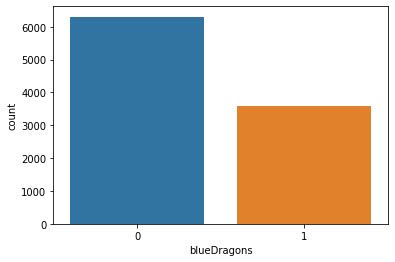

In [305]:
sns.countplot(x=lol.blueDragons);

In [313]:
pd.crosstab(index=lol.blueDragons, columns=lol.blueWins)

blueWins,0,1
blueDragons,,
0,3665,2638
1,1284,2292


In [314]:
pd.crosstab(index=lol.blueDragons, columns=lol.blueWins, aggfunc='mean', values=lol['blueKills'])

blueWins,0,1
blueDragons,,
0,4.969986,6.946929
1,5.741433,7.494764
